# Задание 2

### 1. Одномерная линейная регрессия.
Вывести формулу линейной регрессии для одномерного случая. Дана
выборка $\{x_i,y_i\}_{i=1}^N$, минимизируя среднеквадратичную ошибку определить
коэффициенты линейной регрессии: $a(x)=w_0+w_1x$.

### 2. Оптимальный шаг градиентного спуска. 
Рассмотрим задачу обучения линейной регрессии:

$$
Q(\vec{w})=(X\vec{w}-\vec{y})^T(X\vec{w}-\vec{y}) \to \min_{w},
$$
и будем решать ее с помощью градиентного спуска. Допустим, мы находимся на некоторой итерации $k$, и хотим выполнить очередной шаг:
$$
\vec{w}^{(k)}=\vec{w}^{(k-1)}-\eta \nabla_w Q(\vec{w}^{(k-1)}).
$$
При известных $ \vec{y}, X,\vec{w}^{(k-1)}$, определите длину шага $\eta$, при которой уменьшение значение функционала будет наибольшим, т.е.: 

$$
Q(\vec{w}^{(k-1)}-\eta \nabla_w Q(\vec{w}^{(k-1)})) \to \min_{\eta}.
$$

In [298]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import ShuffleSplit

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.model_selection import GridSearchCV
from random import randint

### 3. Стохастический градиентный спуск 
Напишите функцию стохастического градиентного спуска. 
Функция использует для оценки градиента всего функционала ошибки значение градиента, вычисленного по подвыборке размера batch_size=10. Визуализируйте траекторию, длина шага $\eta=1$.

In [299]:
np.random.seed(17)
n_features = 2
n_objects = 300
w_true = np.array([1.0,1.0])
X = np.random.uniform(-5,5, (n_objects, n_features))
Y = X.dot(w_true) + np.random.normal(0,1, (n_objects))

In [300]:
#ваш код здесь
def stohastic_grad_descent(X, y, w_0,step_size, num_steps):
    w = w_0.copy()
    w_list = []
    for i in range(num_steps):
        w_list.append(w)
        X_k = []
        Y_k = []
        batch_size=10
        for i in range(batch_size):
            n = randint(0, len(X)-1)
            X_k.append(X[n])
            Y_k.append(Y[n])
        X_k = np.array(X_k)
        Y_k = np.array(Y_k)
        w = w - 2  * step_size * np.dot(X_k.T, np.dot(X_k, w)-Y_k)/Y_k.shape[0]
        #w =w- 2 * step_size * np.dot(X.T, np.dot(X, w) - y)/Y.shape[0]
    return w_list

In [301]:
num_steps = 20
step_size = 1e-2
w_0 = np.array([0,0])
w_list = stohastic_grad_descent(X, Y, w_0,step_size, num_steps)
w_list = np.array(w_list)

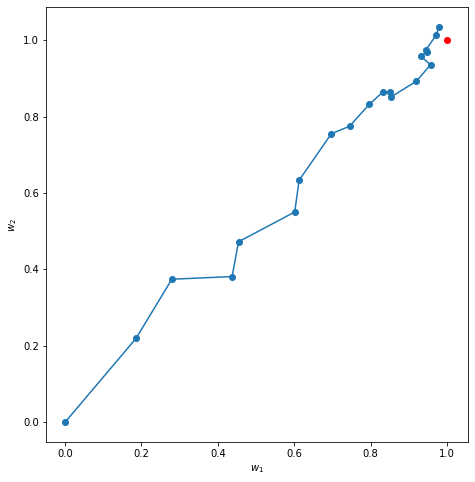

In [302]:
plt.figure(figsize=(12, 8))
plt.xlabel(r'$w_1$')
plt.ylabel(r'$w_2$')
plt.gca().set_aspect('equal')

# visualize trajectory
plt.scatter(w_true[0], w_true[1], c='r')
plt.scatter(w_list[:, 0], w_list[:, 1])
plt.plot(w_list[:, 0], w_list[:, 1])

plt.show()

### 4. Линейная регрессия на данных. Оценка важности признаков.  

In [297]:
from sklearn.datasets import load_boston
data = load_boston()
feature_names = data.feature_names
print(feature_names)
X = data.data
y = data.target
N, d = X.shape
print( N, d)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
506 13


#### 4.1 Напишите функцию, которая вычисляет ошибку RMSE (root mean square error):
$$ RMSE(a,\mathbb X)=\sqrt{\frac{\sum_{i=1}^{N}(a(x_i)-y_i)^2}{N}}.$$

In [303]:
from math import sqrt
def rmse(Y,y_pred):
    summ = 0
    for i in range(len(Y)):
        summ += (Y[i]-y_pred[i])**2
    res = sqrt(summ/len(Y))
    return res
        
lr = LinearRegression()
lr.fit(X,Y)
y_pred = lr.predict(X)
print(rmse(Y,y_pred))

1.0773164349465651


Разделение выборки на обучающую и тестовую

In [304]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,random_state=42) # train -обучающая, test - тестовая

Стандартизация признаков

In [305]:
print(len(X_train),len(X_test))

210 90


In [306]:
print(np.mean(X_train,axis=0))

[ 0.02155753 -0.09602073]


In [307]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)

In [308]:
print(np.mean(X_train,axis=0))
print(np.std(X_train,axis=0))

[-3.17206578e-18 -6.58203650e-17]
[1. 1.]


In [309]:
X_test = scaler.transform(X_test)

In [310]:
print(np.mean(X_test,axis=0))

[-0.02824067  0.15525707]


Разбейте выборку на обучающую и тестовую в соотношении 7:3. Проведите стандартизацию признаков, постройте линейную регресcию и ответьте на следующие вопросы. 
#### 4.2. Какова ошибка RMSE  линейной регрессии на обучающей  выборке?

#### 4.3. Какова ошибка RMSE линейной регрессии на тестовой выборке?

In [311]:
lr_train = LinearRegression()
lr_train.fit(X_train,Y_train)
y_pred = lr_train.predict(X_train)
print("Ошибка RMSE линейной регрессии на обучающей выборке: ",rmse(Y_train,y_pred))
lr_test = LinearRegression()
lr_test.fit(X_test,Y_test)
y_pred = lr_test.predict(X_test)
print("Ошибка RMSE линейной регрессии на тестовой выборке: ",rmse(Y_test,y_pred))

Ошибка RMSE линейной регрессии на обучающей выборке:  1.133961309015014
Ошибка RMSE линейной регрессии на тестовой выборке:  0.9302093635129306


####  4.4. Распределение ошибок на обучающей выборке. 
Посчитайте отклонение на каждом обучающем объекте: 
$$\delta^{j}_{train}=y_{pred}^{j}-y_{train}^{j},$$
и постройте распределение этих отклонений. Какой статистике подчиняется полученное распределение?

Text(0.5, 1.0, 'Распределение отконений на каждом обучающем объекте')

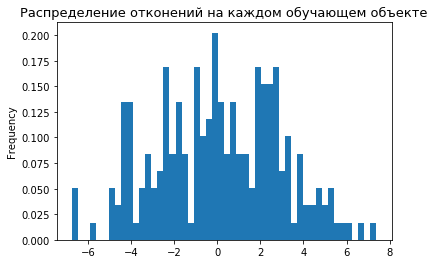

In [312]:
otkl = []
y_tr_pred = lr.predict(X_train)
for i in range(len(Y_train)):
    o = y_tr_pred[i]-Y_train[i]
    otkl.append(o)
    
plt.hist(otkl, bins = 50,density=True)
plt.ylabel('Frequency',fontsize=10)
plt.title('Распределение отконений на каждом обучающем объекте',fontsize=13)


#### 4.5. Постройте диаграмму важности признаков. 
Используйте plt.bar, отсортируйте признаки по важности (модуль соответствующего коэффициента в линейной регрессии) и постройте диаграмму.  Какой признак наиболее важный?

<BarContainer object of 2 artists>

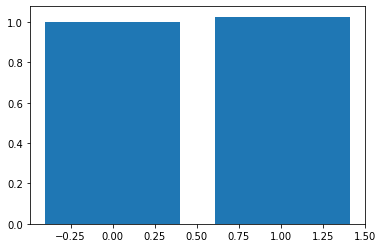

In [313]:
#ваш код здесь
x = {}
for i in range(len(X[0])):
    x.setdefault(i, lr.coef_[i])
    #x[i] = lr.coef_[i]
list_x = list(x.items())
list_x.sort(key=lambda i: i[1], reverse = True)
plt.bar(list_x[1],list_x[0])